In [1]:
#pip install tweepy

In [2]:
#pip install wordcloud

In [3]:
#pip install TextBlob

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import tweepy as tw
import seaborn as sns
import configparser 
from tweepy import OAuthHandler 
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rrath/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
df = pd.read_csv("extracted_tweets.csv")
print (df)

                                                   text             user
0     @HillaryClinton The government is paying the r...    mightymatt777
1     RT @CawthornforNC: You can thank Joe Biden for...  korbendallas500
2     RT @PalmerReport: As of today, Ron Bloom is of...       Lilly15251
3     RT @GregAbbott_TX: BREAKING:\n\nA federal cour...        Marco_b72
4     RT @disclosetv: JUST IN - Russia sends warning...           xrp334
...                                                 ...              ...
1495  Biden Orders Federal Vehicles and Buildings to...    CaroleLewisDC
1496  RT @StrikeDebt: Good morning. Biden's law degr...   Bnative_Philly
1497  RT @Jim_Jordan: President Obama gave Ukraine b...     DodgeCorrine
1498  RT @disclosetv: JUST IN - Russia sends warning...        FrodrickW
1499  RT @SurgingRite: Crime Pays In Biden’s America...  freedomfirstnet

[1500 rows x 2 columns]


In [6]:
sid = SentimentIntensityAnalyzer()
sentiment_scores = df['text'].apply(sid.polarity_scores)
sentiment = sentiment_scores.apply(lambda x: x['compound'])
df['sentiment_score'] = sentiment_scores

Neutral     644
Positive    554
Negative    302
Name: Analysis, dtype: int64


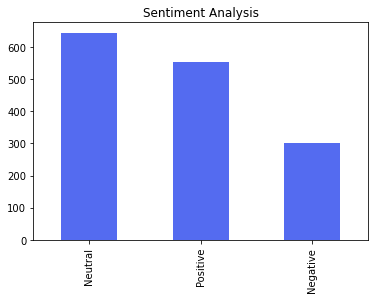

In [7]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['text'].apply(getSubjectivity)
df['Polarity'] = df['text'].apply(getPolarity)

# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)

#Show number of positive,neural,negative
print(df['Analysis'].value_counts())

#Show Graph of sentiment analysis

colors = ["#546BF0"]
sns.set_palette(sns.color_palette(colors))
plt.title('Sentiment Analysis')
plt.figure(1,figsize=(10, 10))
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

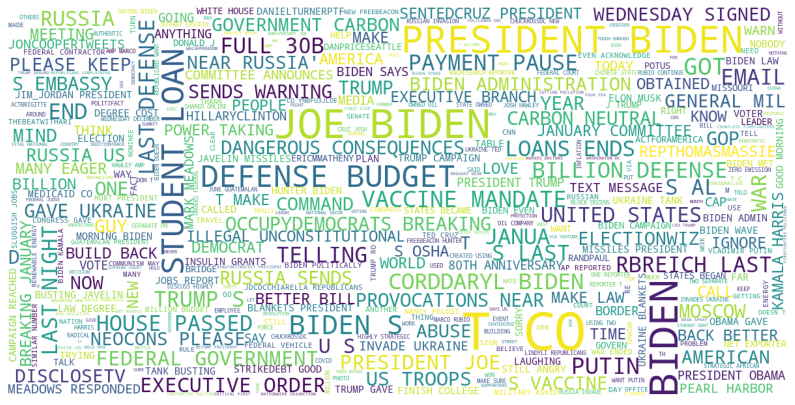

In [8]:
#Function for Word Cloud
def wordcloud_tweets(tweets):
    
    stopwords = set(STOPWORDS)
    stopwords.update(["the", "and", "our", "in", "my", "will", "at", "rt", "http", "https"])
   
    wordcloud = WordCloud(max_font_size=80, max_words=400, width=1200, height=600, background_color="white", stopwords=stopwords, random_state = 2016).generate(" ".join([i for i in tweets['text'].str.upper()]))

    #plt.imshow(wordcloud, interpolation="bilinear")
    #plt.axis("off")
    
    plt.figure(2,figsize=(14, 14))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
  
wordcloud_tweets(df)
